### DATASET can be downloaded here -> https://www.kaggle.com/vetrirah/customer

## Steps for Applied Machine Learning (ML) for Hackathons :

1.  Understand the Problem Statement & Import Packages and Datasets.  

2.  Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

       *       Explore Train and Test Data and get to know what each Column / Feature denotes.
       *       Check for Imbalance of Target Column in Datasets.
       *       Visualize Count Plots & Unique Values to infer from Datasets.
            
3.  Remove Duplicate Rows from Train Data if present.

4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill.

5.  Feature Engineering 

      *       Feature Selection - Selection of Most Important Existing Features.
      *       Feature Creation  - Creation  of New Feature from the Existing Features.
      
6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent).      
7.  Data Encoding - Label Encoding, OneHot Encoding and Data Scaling - MinMaxScaler, StandardScaler, RobustScaler
8.  Create Baseline ML Model for Multi Class Classification Problem
9.  Improve ML Model,Fine Tune with MODEL Evaluation METRIC - "Accuracy" and Predict Traget "Outcome"
10. Result Submission, Check Leaderboard & Improve "Accuracy" Score

## 1.  Understand the Problem Statement & Import Packages and Datasets :

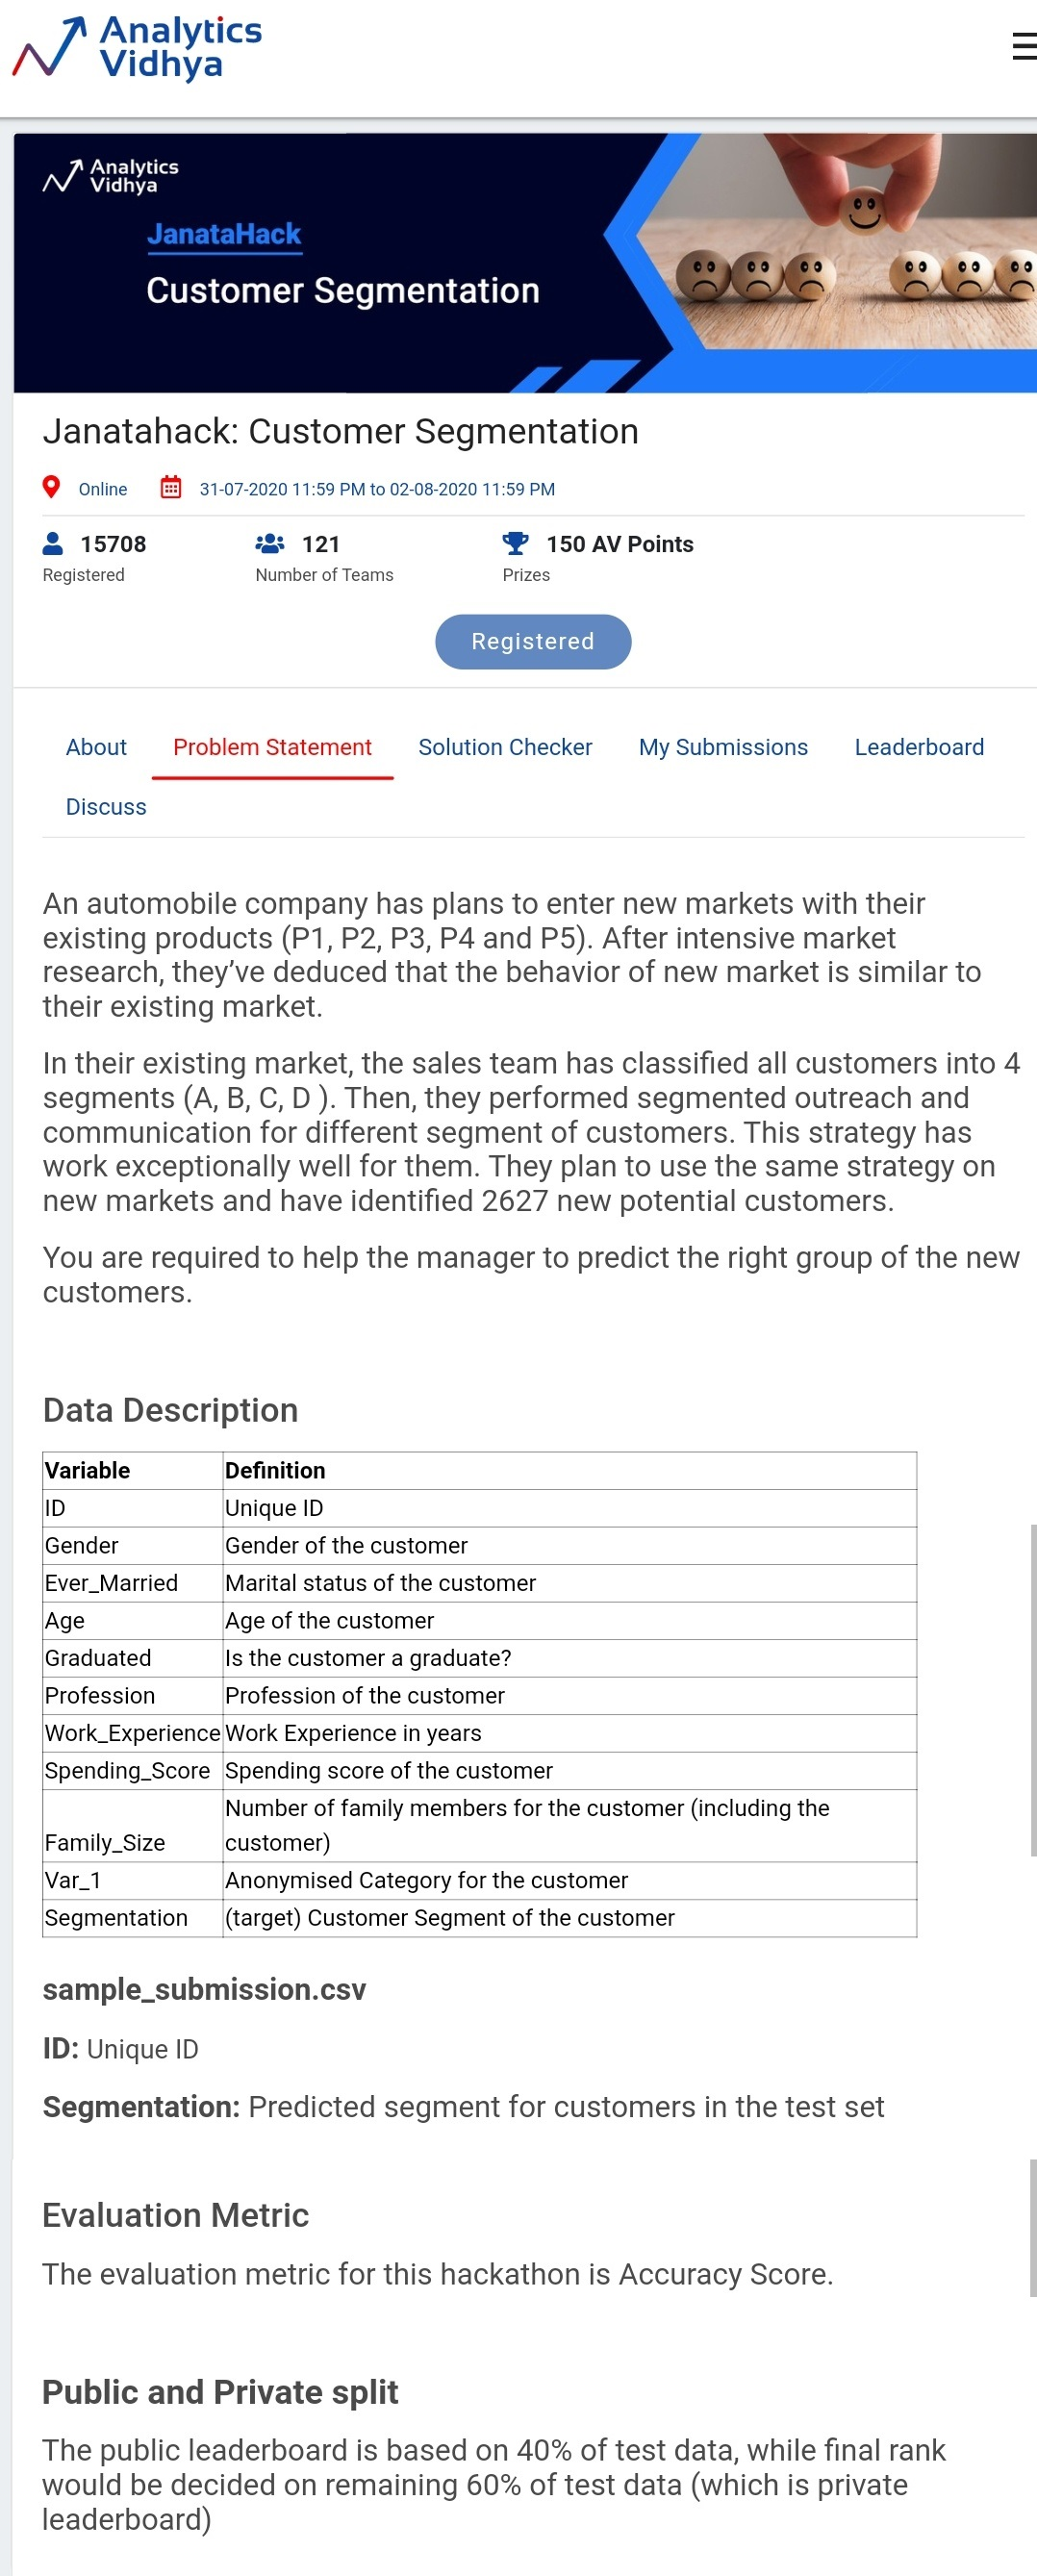

In [ ]:
# Import Required Python Packages :

# Scientific and Data Manipulation Libraries :

import numpy as np
import pandas as pd

# Data Viz & Regular Expression Libraries :

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Scikit-Learn ML Libraries :

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

# Garbage Collection Libraries :

import gc

# Boosting Algorithm Libraries :

from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.ensemble                 import RandomForestClassifier, VotingClassifier
from sklearn.metrics                  import accuracy_score
from sklearn.model_selection          import StratifiedKFold,KFold

In [ ]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Load data 

train = pd.read_csv('../input/customer/Train.csv')
test = pd.read_csv('../input/customer/Test.csv')
sub = pd.read_csv('../input/customer/sample_submission.csv')

## 2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :    

### 2.1 Explore Train and Test Data and get to know what each Column / Feature denotes :

In [ ]:
# Python Method 1 : Displays Data Information :

def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "train" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train, data_types, "train")

In [ ]:
# Display Data Information of "test" :

display_data_information(test, data_types, "test")

In [ ]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "train", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(train, head_rows=3, tail_rows=2)

In [ ]:
display_head_tail(test, head_rows=3, tail_rows=2)

In [ ]:
# Python Method 3 : Displays Data Description using Statistics :

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
    print("")
    display(data.describe( include = categorical_data_types))

# Display Data Description of "train" :

display_data_description(train, data_types[0:4], data_types[4:7])

In [ ]:
# Display Data Description of "test" :

display_data_description(test, data_types[0:4], data_types[4:7])

In [ ]:
# Checking Percentage(%) of Common ID's  between train and test data using Unique train values :

print(np.intersect1d(train['ID'], test['ID']).shape[0]/train['ID'].nunique())
common_ids = len(set(test['ID'].unique()).intersection(set(train['ID'].unique())))
print("Common IDs : ",common_ids)

# Data Leak as out of 2627 Rows , there are 2332 ID's in Common

print("Unique IDs : ",test.shape[0] - common_ids)

In [ ]:
testx = pd.merge(test,train,how='left', on = 'ID')

## 3.  Remove Duplicate Rows from Train data if present :

In [ ]:
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

# Remove Duplicates from "train" data :

train = remove_duplicate(train)

# No Duplicates at all !!!

## 4.  Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill :

In [ ]:
# # Python Method 5 : Fills or Imputes Missing values with Various Methods : 

# def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
#     print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
#     display(data.isnull().sum())
#     for column in columns :
        
#         # Fill Missing Values with Specific Value :
#         if "Value_Fill" in fill_types :
#             data[ column ] = data[ column ].fillna(fill_value)
# #             print("Value_Fill")

#         # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
#         if "Forward_Fill" in fill_types :
#             data[ column ] = data[ column ].ffill(axis = 0)
# #             print("Forward_Fill")

#         # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
#         if "Backward_Fill" in fill_types :
#             data[ column ] = data[ column ].bfill(axis = 0)
# #             print("Backward_Fill")
    
#     print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
#     display(data.isnull().sum())
    
#     return data

# fill_types = [ "Forward_Fill"]
# fill_value = 0
# # Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" : 
# train = fill_missing_values(train, fill_value, fill_types, ["Registration_Date"],"train")

# # Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" :
# test  = fill_missing_values(test, fill_value, fill_types, ["Registration_Date"],"test")

In [ ]:
# Let LightGBM Classifier Handle the Issues :

In [ ]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")
        
# Displays Unique Values in Each Column of "train" :
# Check "train" data for Values of each Column - Long Form :

display_unique(train)

# Display this info in a Table Format - Improvements coming In Part 2

In [ ]:
# Check "train" data for Values of each Column - Short Form :
# Use Whichever you feel good working with :

for i in train:
    print(f"column {i} unique values {train[i].unique()}")

### Multi - Class Classification Problem - Target has more than 2 Categories - 
### Target - Segmentation has 4 Values of Customers ['D' 'A' 'B' 'C']

## 5.  Feature Engineering

### 5.1 Feature Selection - Selection of Most Important Existing Features
### 5.2 Feature Creation  - Creation  of New Features from the Existing Features / Predictors :

In [ ]:
# Concatenate train and test data into single DataFrame - df :

train['is_train'] = 1
test['is_train'] = 0
df = pd.concat([train,test])

In [ ]:
# Convert 2 Categorical(String) Columns 'City_Type','Employer_Category' using Label Encode Technique :
# Docs : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Label encode category values

from sklearn.preprocessing import LabelEncoder

for i in ['Gender' , 'Ever_Married' , 'Graduated','Profession','Spending_Score','Var_1'  ]:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype('str'))

In [ ]:
# Mapping Values to Label ENCODED Values :

df['Segmentation'] = df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [ ]:
# Get Back train data from df with a condition on column is_train == 1 :

train = df[df['is_train'] == 1]

## 6.  Split Train Data into Train and Validation Data with Predictors(Independent) & Target(Dependent) :

In [ ]:
# split train into 5 folds and apply random forest and check accuracy of each fold

predictor_train = train.drop(['Segmentation','is_train','ID'],axis=1)
target_train    = train['Segmentation']

In [ ]:
predictor_test = test.drop(['is_train','ID'],axis=1)

## 7.  Data Encoding - Label Encoding :

In [ ]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        Encoder = LabelEncoder()
        for column in encoding_columns :
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
#         display(encoding_data[encoding_columns])
        encoding_data = pd.get_dummies( encoding_data  )
        
    elif encoding_strategy == "TargetEncoding":
        ## Code Coming soon
        print("TargetEncoding")

    else :
        encoding_data = pd.get_dummies( encoding_data[encoding_columns]  )
        
    dtypes_list =['float64','float32','int64','int32']
    # BEST CODE : 0.6872386379302422
#     encoding_data.astype( dtypes_list[0] ).dtypes # UNCOMMENTED EARLIER
    # NEW CODE : 0.6872386379302422 - NO CHANGE !!!
    # encoding_data.astype( dtypes_list[0] ).dtypes - COMMENTED NOW
    
    return encoding_data

encoding_columns  = [ "Gender", "Ever_Married" , "Graduated", "Profession" , "Spending_Score", "Var_1" ]
encoding_strategy = [ "OneHotEncoding", "LabelEncoding", "TargetEncoding", "ELSE"]

predictor_train_encode = data_encoding( encoding_strategy[1] , predictor_train , encoding_columns )
predictor_test_encode  = data_encoding( encoding_strategy[1] , predictor_test ,  encoding_columns )

In [ ]:
print("predictor_train_encode SHAPE   : ",predictor_train_encode.shape)
display("predictor_train_encode COLUMNS : ",predictor_train_encode.head())

print("predictor_test_encode SHAPE   : ",predictor_test_encode.shape)
display("predictor_test_encode COLUMNS : ",predictor_test_encode.head())

## 8.  Create Baseline ML Model :

In [ ]:
# Mention Categorical Values of the Light GBM Model to Handle :
categorical_features = ["Gender", "Ever_Married" ,"Graduated" ,"Profession" ,"Spending_Score" ,"Var_1" ]

lgb_model = LGBMClassifier()

# Apply Stratified K-Fold Cross Validation where K=5 or n_splits=5 :
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
acc = []

# Pass predictor_train,target_train for Cross Validation :
for fold,(t_id,v_id) in enumerate(kf.split(predictor_train,target_train)):
    
    # Split train and validation data :
    tx = predictor_train.iloc[t_id]; ty = target_train.iloc[t_id]
    vx = predictor_train.iloc[v_id]; vy = target_train.iloc[v_id]
    
    # Train/Fit the Data to LighGBM Model :
    lgb_model.fit(tx,ty, categorical_feature = categorical_features )
    
    # Predict the Validation Data to Train LighGBM Model :
    val_y = lgb_model.predict(vx)
    
    # Get Accuracy Score on Validation Data for Each Fold :
    acc_score = accuracy_score(vy,val_y)
    acc.append(acc_score)
    print(f"fold {fold} accuracy {acc_score}")

# Get Mean of Accuracy Score on Validation Data for All 5 Folds :
print(f"Mean accuracy score {np.mean(acc)}")

## 9. Improve ML Model,Fine Tune with MODEL Evaluation METRIC - "Accuracy" and Predict Target "Segmentation" :

In [ ]:
# Tuned the Hyperparameters of LighGBM Classifier :
lgb_model = LGBMClassifier(
                                   boosting_type='gbdt', 
                                   max_depth=15, 
                                   learning_rate=0.15, 
                                   objective='multiclass', # Multi Class Classification
                                   random_state=100,  
                                   n_estimators=1000 ,
                                   reg_alpha=0, 
                                   reg_lambda=1, 
                                   n_jobs=-1
                                 )

In [ ]:
# Mention Categorical Values of the Light GBM Model to Handle :
categorical_features = ["Gender", "Ever_Married" ,"Graduated" ,"Profession" ,"Spending_Score" ,"Var_1" ]

# Apply Stratified K-Fold Cross Validation where K=5 or n_splits=5 :
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
acc = []

# Pass predictor_train,target_train for Cross Validation :
for fold,(t_id,v_id) in enumerate(kf.split(predictor_train,target_train)):
    
    # Split train and validation data :
    tx = predictor_train.iloc[t_id]; ty = target_train.iloc[t_id]
    vx = predictor_train.iloc[v_id]; vy = target_train.iloc[v_id]
    
    # Train/Fit the Data to LighGBM Model :
    lgb_model.fit(tx,ty, categorical_feature = categorical_features )
    
    # Predict the Validation Data to Train LighGBM Model :
    val_y = lgb_model.predict(vx)
    
    # Get Accuracy Score on Validation Data for Each Fold :
    acc_score = accuracy_score(vy,val_y)
    acc.append(acc_score)
    print(f"fold {fold} accuracy {acc_score}")

# Get Mean of Accuracy Score on Validation Data for All 5 Folds :
print(f"Mean accuracy score {np.mean(acc)}")

In [ ]:
def model_train_predict_submit( Classifiers_model_name, model_name ,X_train, y_train, X_test, target):
    
    categorical_features = ["Gender", "Ever_Married" ,"Graduated" ,"Profession" ,"Spending_Score" ,"Var_1"  ]
    Classifiers_model_name.fit( X_train, y_train , categorical_feature = categorical_features )
    final_predictions = Classifiers_model_name.predict( X_test )
    print(final_predictions)  
   
    Result_Promoted = pd.DataFrame({'ID': sub['ID'], target : final_predictions})
    Result_Promoted[ target ]=Result_Promoted[ target ].map({0: "A", 1: "B", 2: "C", 3: "D" })
    print(Result_Promoted[ target ].unique())
    Result_Promoted.to_csv(model_name +"_Labelling=Yes_Scaling=Yes"+".csv",index=False)
    return Result_Promoted

model_name       = "LGBM_Tuned_BEST"
model_classifier = lgb_model
sub = model_train_predict_submit( model_classifier, model_name, predictor_train_encode,target_train, predictor_test_encode, target = 'Segmentation')

## 10. Result Submission, Check Leaderboard & Improve "ACCURACY" :

In [ ]:
sub1 = pd.merge(sub,testx,how='left',on='ID')
sub1.head()

In [ ]:
sub['segmentation2'] = sub1['Segmentation_y']
sub.head()

In [ ]:
sub['segmentation2'] = sub['segmentation2'].fillna('x')
for i in range(len(sub)):
    if sub.iloc[i,2] != 'x':
        sub.iloc[i,1] = sub.iloc[i,2]
        
sub[['ID','Segmentation']].to_csv('FINAL_LGBM_BEST_SUBMISSION_TUNED.csv',index = False)

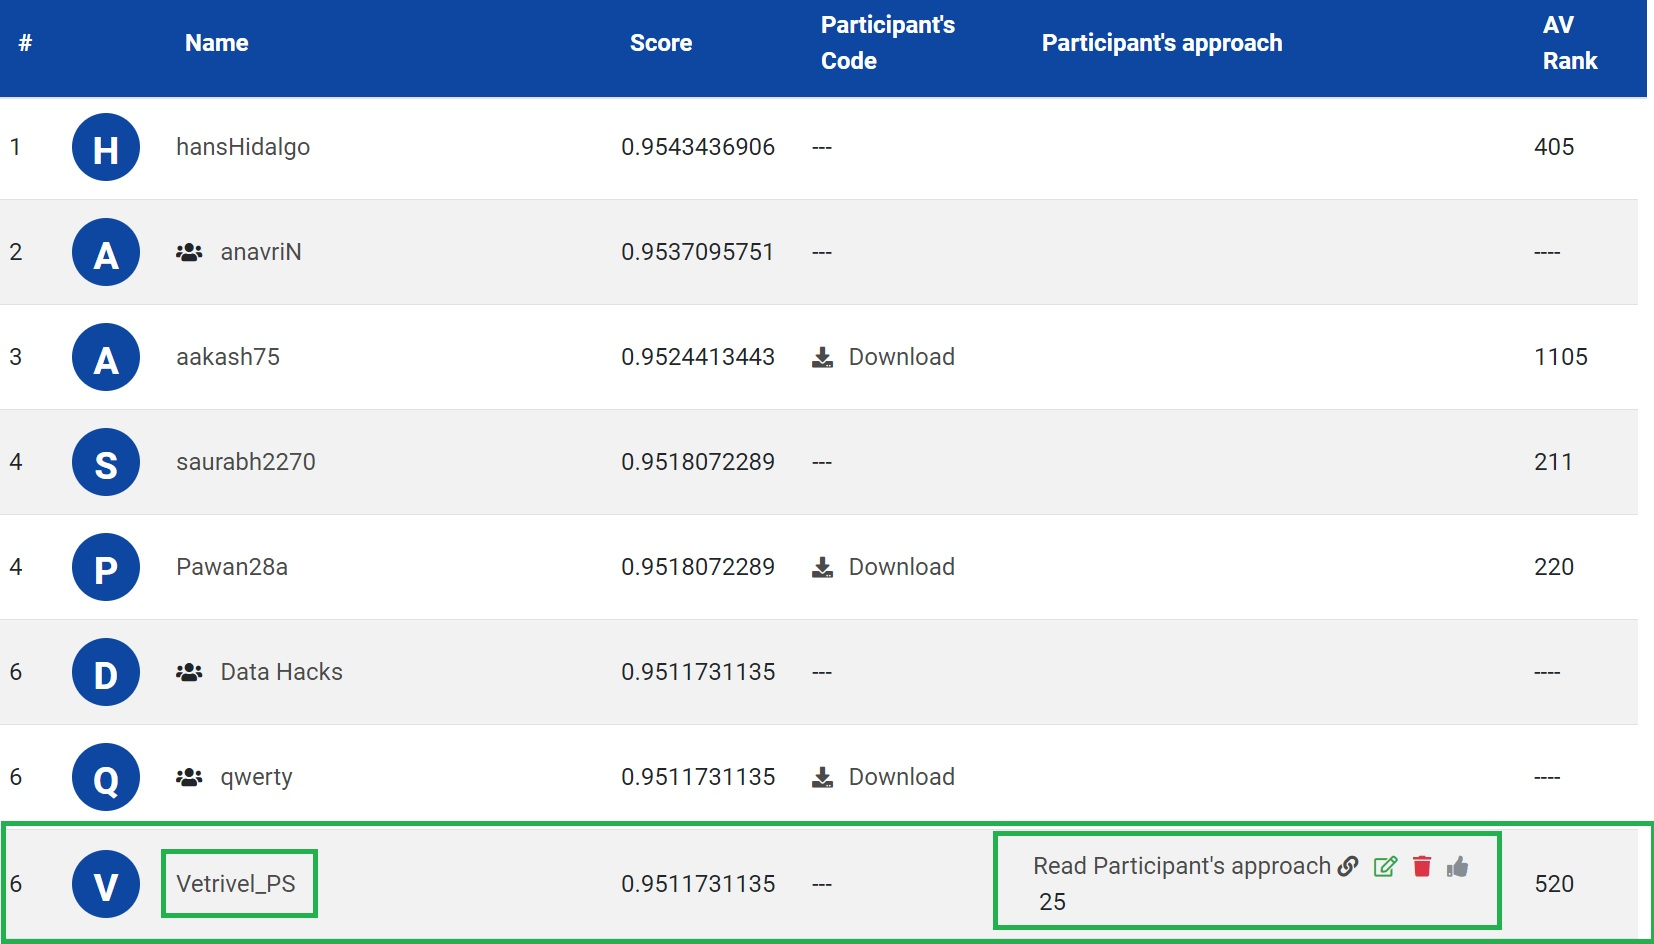

### **<center>😊 Reached Rank 6 - Top 5 Private Score - Thanks for reading Friends. See you all in Part 2 for more Analysis and Modelling - ENCOURAGE if you liked this Notebook 😊</center>**

### **<center>😊 For Learning Purpose - You can still participate in your free time to see your Public and Private Scores & Rank, though it won't reflect on Leaderboard 😊</center>**

### **<center>😊 Ask your doubts & Share your thoughts, ideas & feedbacks in Comments below 😊</center>**